# Chapter 5. 데이터 분석 - 공개 데이터 분석 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Seaborn Tip Data

In [3]:
data = sns.load_dataset('tips')
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## 데이터 정보

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 데이터 요약

In [5]:
data.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## 결측치 처리

In [6]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## 데이터 시각화

### 1). 점심, 저녁 식사 비용 Histogram

<Axes: xlabel='total_bill', ylabel='Count'>

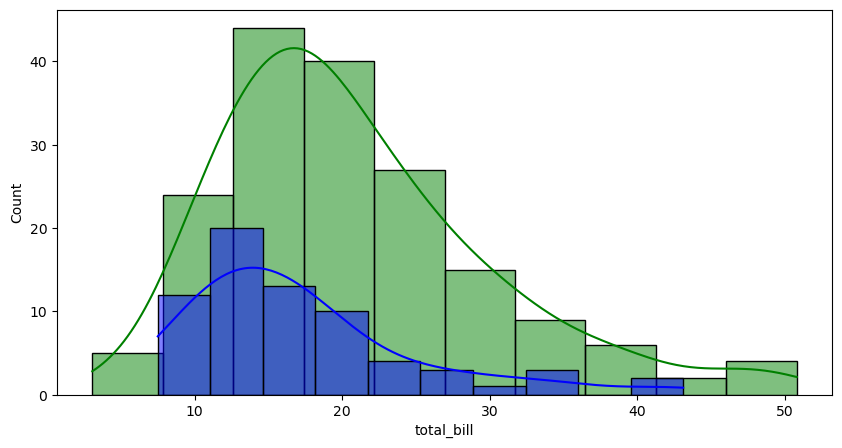

In [7]:
plt.figure(figsize = (10,5))

sns.histplot(data[data['time'] == 'Dinner']['total_bill'], bins = 10, kde = True, color = 'g', alpha = 0.5)
sns.histplot(data[data['time'] == 'Lunch']['total_bill'], bins = 10, kde = True, color = 'b', alpha = 0.5)

<Axes: xlabel='total_bill', ylabel='Count'>

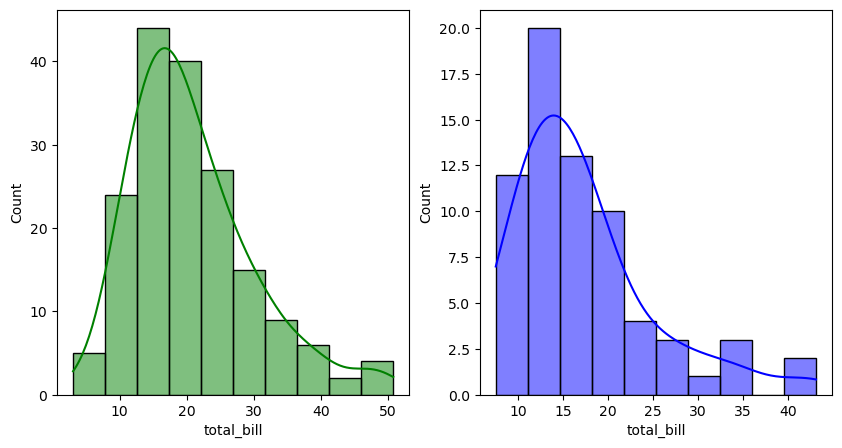

In [8]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(data[data['time'] == 'Dinner']['total_bill'], bins = 10, kde = True, color = 'g', alpha = 0.5)

plt.subplot(1,2,2)
sns.histplot(data[data['time'] == 'Lunch']['total_bill'], bins = 10, kde = True, color = 'b', alpha = 0.5)

### 2). 식사 비용과 팁의 관계

<Figure size 1000x500 with 0 Axes>

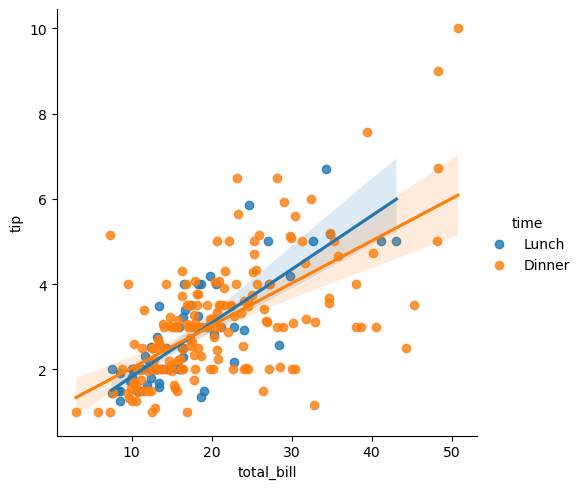

In [9]:
plt.figure(figsize = (10,5))

sns.lmplot(x = 'total_bill', y = 'tip', data = data, hue = 'time')

### 3). 식사 비용과 고객의 수 관계

<Figure size 1000x500 with 0 Axes>

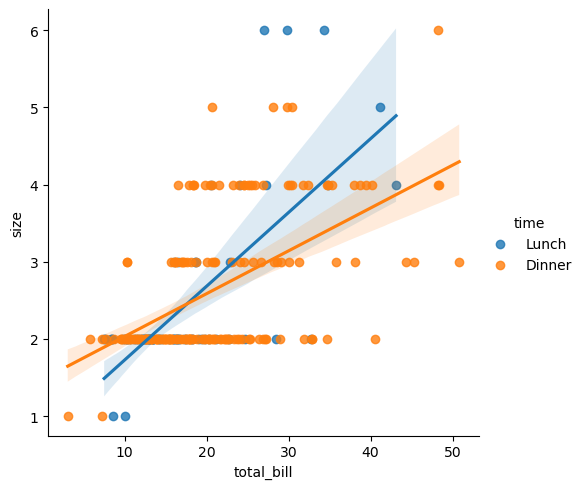

In [10]:
plt.figure(figsize = (10,5))

sns.lmplot(x = 'total_bill', y = 'size', data = data, hue = 'time')

# 2. Kaggle Wine Data
* red_wine : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
* white_wine : https://www.kaggle.com/datasets/piyushagni5/white-wine-quality

In [11]:
df_rw = pd.read_csv('./Data/winequality-red.csv')
df_rw['category'] = 'red'
df_ww = pd.read_csv('./Data/winequality-white.csv', sep = ';')
df_ww['category'] = 'white'

data = pd.concat([df_rw, df_ww]).reset_index()
data.head(3)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [12]:
data = data.drop('index', axis = 1)
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


## 데이터 정보

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## 데이터 요약

In [14]:
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


## 결측치 처리

In [15]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
category                0
dtype: int64

## 데이터 시각화

### 1). Wine Quality

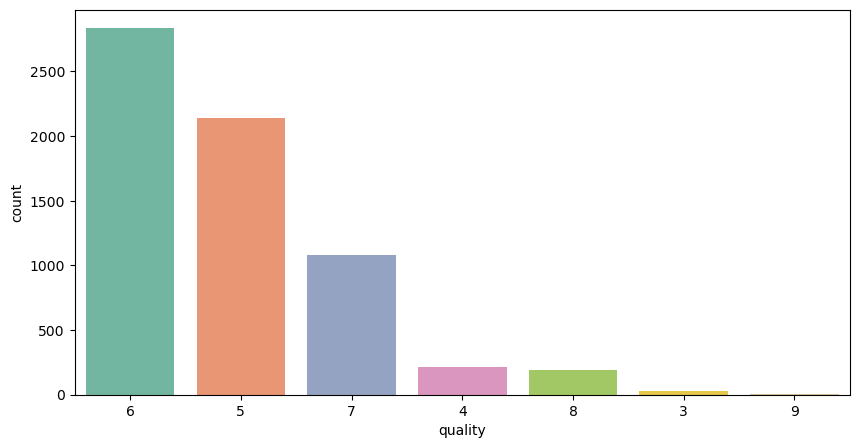

In [16]:
plt.figure(figsize = (10,5))

sns.set_palette('Set2')
sns.countplot(x = 'quality', data = data, order = data['quality'].value_counts().index)

plt.show()

### 2). 상관분석

#### Heatmap

<Axes: >

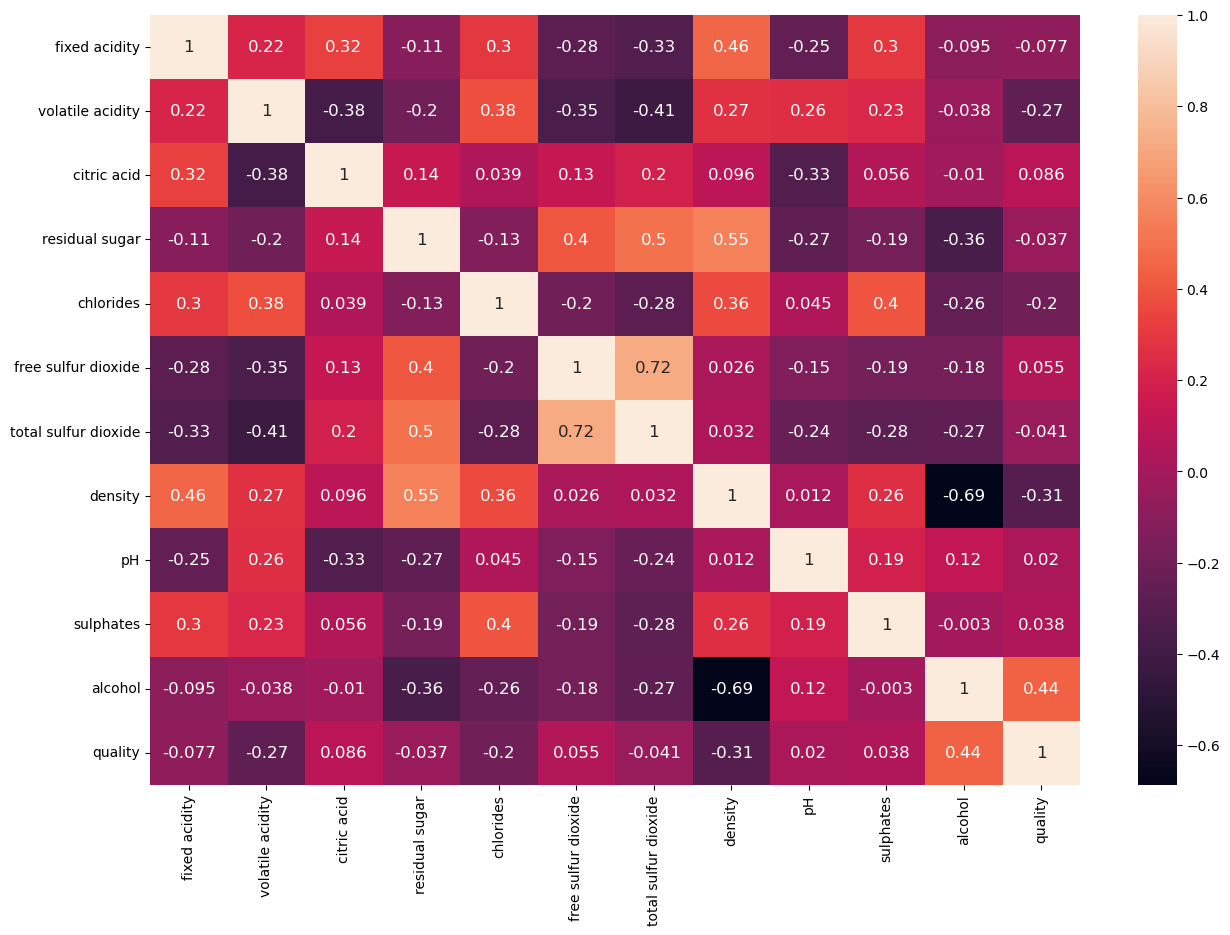

In [17]:
plt.figure(figsize = (15,10))

sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 12})

#### Relplot

<Figure size 1500x1000 with 0 Axes>

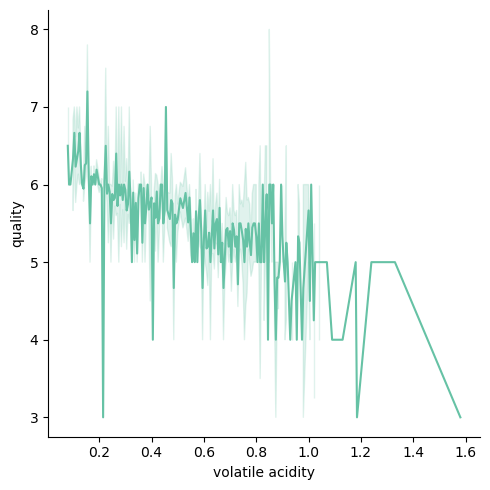

In [18]:
plt.figure(figsize = (15,10))

sns.relplot(x = 'volatile acidity', y = 'quality', kind = 'line', data = data)

<Figure size 1500x1000 with 0 Axes>

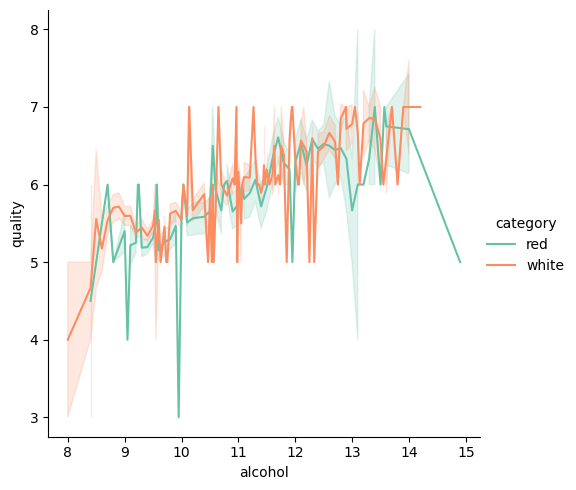

In [19]:
plt.figure(figsize = (15,10))

sns.relplot(x = 'alcohol', y = 'quality', kind = 'line', data = data, hue = 'category')

#### lmplot

<Figure size 1000x500 with 0 Axes>

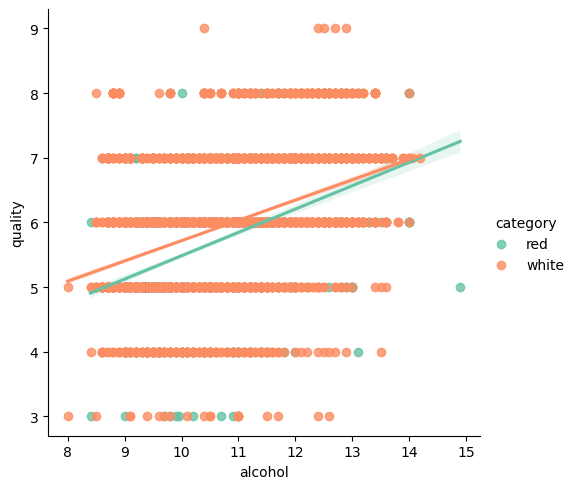

In [20]:
plt.figure(figsize = (10,5))

sns.lmplot(x = 'alcohol', y = 'quality', data = data, hue = 'category')

# 3. Seoul CCTV Data

In [21]:
df_cctv = pd.read_csv('./Data/CCTV_in_Seoul.csv', encoding = 'cp949')
df_cctv.rename(columns = {df_cctv.columns[0] : '구별'}, inplace = True)

df_popul = pd.read_excel('./Data/Population_in_Seoul.xls', header = 2, usecols = 'B, D, G, J, N')
df_popul.rename(columns = {df_popul.columns[0] : '구별',
                           df_popul.columns[1] : '인구수',
                           df_popul.columns[2] : '한국인',
                           df_popul.columns[3] : '외국인',
                           df_popul.columns[4] : '고령자'}, inplace = True)

In [22]:
df_cctv.head(3)

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228


In [23]:
df_popul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [24]:
df_popul.drop([0], inplace = True)
df_popul.head(3)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0


## 결측치 처리

In [25]:
df_cctv.isna().sum()

구별          0
소계          0
2012년 이전    0
2012년       1
2013년       1
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

In [26]:
df_cctv.dropna(axis = 0, inplace = True)
df_cctv.isna().sum()

구별          0
소계          0
2012년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

In [27]:
df_popul.isna().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [28]:
df_popul.dropna(axis = 0, inplace = True)
df_popul.isna().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

## 파생변수 - 외국인 비율, 고령자 비율

In [29]:
df_popul['외국인 비율'] = df_popul['외국인'] / df_popul['인구수'] * 100
df_popul['고령자 비율'] = df_popul['고령자'] / df_popul['인구수'] * 100
df_popul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## 1). CCTV 설치 대수가 가장 작은 구 TOP 3

In [30]:
df_cctv.sort_values(by = '소계').head(3)

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593
19,동작구,"2,306",41,24.0,25.0,503,128,253,271,300,322,419,20
17,금천구,"2,411",0,0.0,174.0,80,361,133,196,539,367,513,48


## 2). CCTV 설치 대수가 가장 많은 구 TOP 3

In [31]:
df_cctv.sort_values(by = '소계', ascending = False).head(3)

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,"6,871",69,67.0,66.0,580,830,1293,988,745,791,926,516
20,관악구,"5,149",440,84.0,431.0,439,609,622,688,674,595,331,236
16,구로구,"4,608",852,216.0,349.0,187,268,326,540,488,434,415,533


## 3). CCTV 최근 증가율

In [32]:
df_cctv['최근 증가율'] = round((df_cctv['2021년'] - df_cctv['2020년']) / df_cctv['2020년'] * 100, 2)
df_cctv.head(3)

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근 증가율
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403,11.63
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,-63.05
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,-40.04


## 4). 외국인 비율이 가장 높은 구

In [33]:
df_popul.sort_values(by = '외국인 비율', ascending = False).head(1)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191


## 5). 고령자 비율이 가장 높은 구

In [34]:
df_popul.sort_values(by = '고령자 비율', ascending = False).head(1)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


## CCTV Data + Population Data

In [35]:
data = pd.merge(df_cctv, df_popul, on = '구별')
data.head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,-63.05,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,-40.04,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
2,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655,274.29,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
3,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219,-1.79,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
4,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448,-52.03,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885


In [36]:
data = data[['구별','소계','최근 증가율','인구수','한국인','외국인','고령자','외국인 비율','고령자 비율']]
data.head(3)

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,용산구,"2,611",-63.05,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,성동구,"3,829",-40.04,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
2,광진구,"3,211",274.29,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [37]:
data.set_index('구별', inplace = True)
data.head(3)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
용산구,"2,611",-63.05,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,"3,829",-40.04,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,"3,211",274.29,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [38]:
data['소계'] = data['소계'].str.replace(',','').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 용산구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      23 non-null     int32  
 1   최근 증가율  23 non-null     float64
 2   인구수     23 non-null     float64
 3   한국인     23 non-null     float64
 4   외국인     23 non-null     float64
 5   고령자     23 non-null     float64
 6   외국인 비율  23 non-null     float64
 7   고령자 비율  23 non-null     float64
dtypes: float64(7), int32(1)
memory usage: 1.5+ KB


## 6). 구별 CCTV 수

In [39]:
import matplotlib

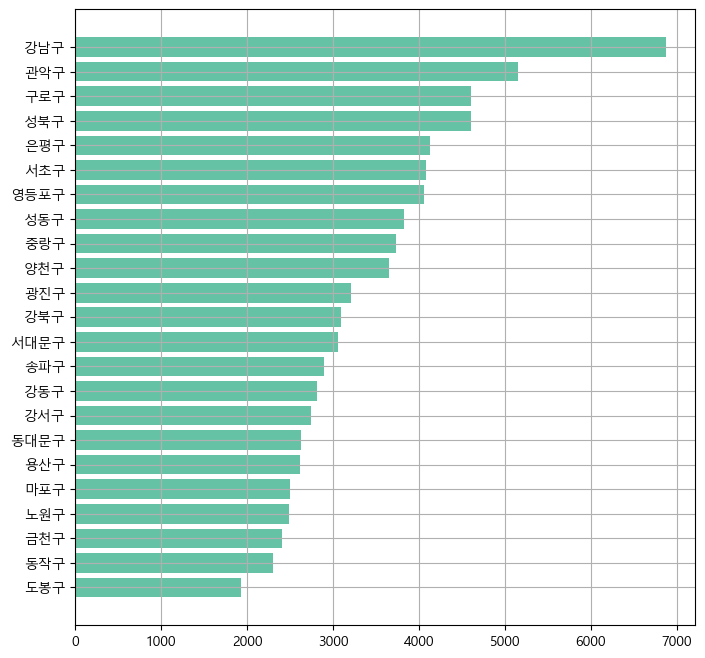

In [40]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

data = data.sort_values(by = '소계')

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)

ax.barh(data.index, data['소계'])
plt.grid()

# 4. Korea Welfare Data
* https://github.com/youngwoos/Doit_Python/blob/main/Data/Koweps_hpwc14_2019_beta2.md

In [41]:
data = pd.read_spss('./Data/Koweps_hpwc14_2019_beta2.sav')
data.head(3)

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN


In [42]:
data = data.rename(columns = {'h14_g3' : 'sex',
                              'h14_g4' : 'birth',
                              'h14_g10' : 'marriage',
                              'h14_g11' : 'religion',
                              'p1402_8aq1' : 'income',
                              'h14_eco9' : 'code_job',
                              'h14_reg7' : 'code_region'})
data = data[['sex','birth','marriage','religion','income','code_job','code_region']]
data.head(3)

,sex,birth,marriage,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0


## 남녀 성비

In [43]:
data['sex'] = np.where(data['sex'] == 1, 'M', 'F')
data['sex'].value_counts()

F    7913
M    6505
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

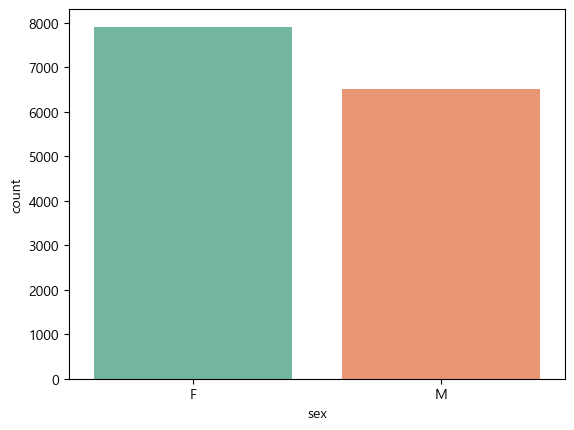

In [44]:
sns.countplot(x = 'sex', data = data)

## 결측치 확인

In [45]:
data.isna().sum()

sex               0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [46]:
data.dropna(subset = ['income'], inplace = True)
data.head(3)

,sex,birth,marriage,religion,income,code_job,code_region
2,M,1942.0,3.0,1.0,107.0,762.0,1.0
3,M,1962.0,1.0,1.0,192.0,855.0,1.0
7,F,1934.0,1.0,1.0,27.0,941.0,1.0


## 1). Income Histogram

<Axes: xlabel='income', ylabel='Count'>

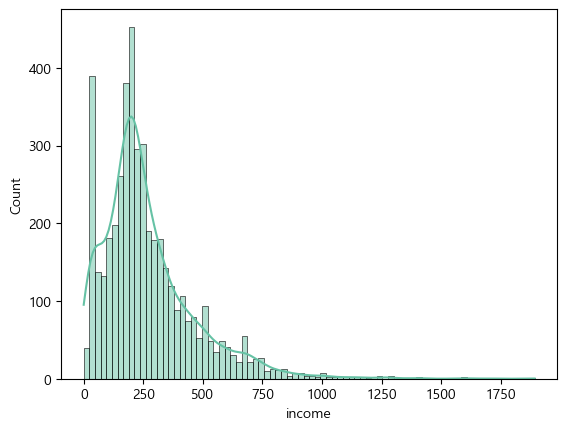

In [47]:
sns.histplot(data['income'], kde = True)

## 2). 성별에 따른 수입의 차이

In [48]:
data.groupby('sex', as_index = False).agg('mean')[['sex','income']]

,sex,income
0,F,186.293096
1,M,349.037571


<Axes: xlabel='sex', ylabel='income'>

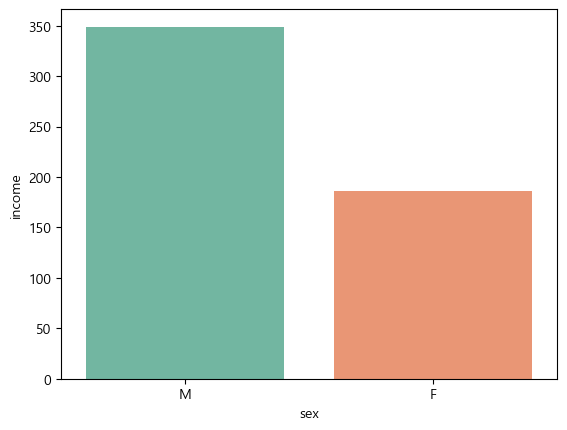

In [49]:
sns.barplot(x = 'sex', y = 'income', data = data, ci = None)

## 3). 연령에 따른 수입의 차이

### 출생 연도 분포

<Axes: xlabel='birth', ylabel='Count'>

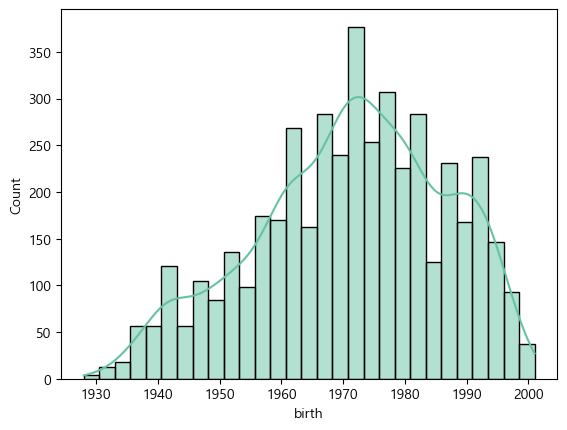

In [50]:
sns.histplot(x = 'birth', data = data, kde = True)

### 파생변수 - 나이(age)

In [51]:
data['age'] = 2023 - data['birth'] + 1
data.head(3)

,sex,birth,marriage,religion,income,code_job,code_region,age
2,M,1942.0,3.0,1.0,107.0,762.0,1.0,82.0
3,M,1962.0,1.0,1.0,192.0,855.0,1.0,62.0
7,F,1934.0,1.0,1.0,27.0,941.0,1.0,90.0


### 나이 분포

<Axes: xlabel='age', ylabel='Count'>

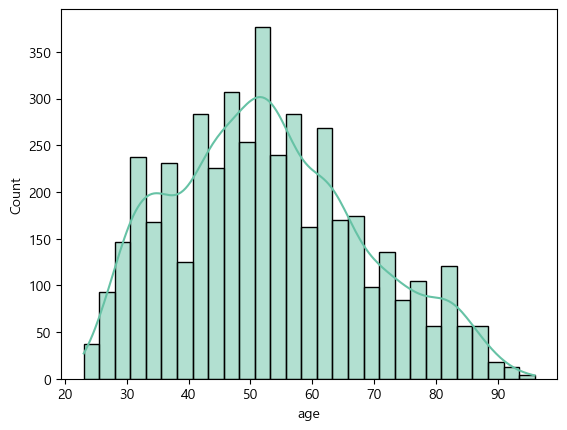

In [52]:
sns.histplot(x = 'age', data = data, kde = True)

([<matplotlib.axis.XTick at 0x1e0346c6e20>,
 [Text(7, 0, '30.0'),
  Text(17, 0, '40.0'),
  Text(27, 0, '50.0'),
  Text(37, 0, '60.0'),
  Text(47, 0, '70.0'),
  Text(57, 0, '80.0'),
  Text(67, 0, '90.0'),
  Text(77, 0, '')])

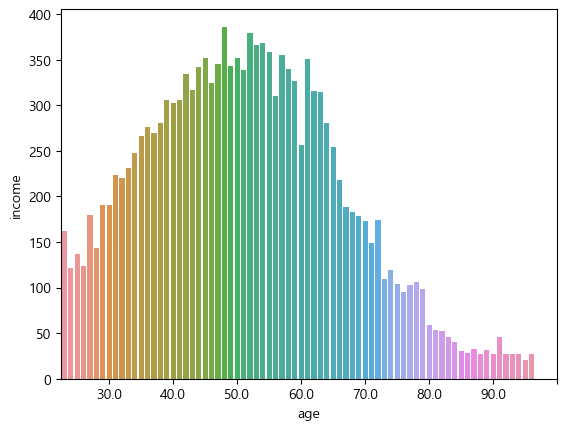

In [53]:
sns.barplot(x = data['age'], y = data['income'], ci = None)
plt.xticks([7,17,27,37,47,57,67,77])

## 4). 나이대별 수입의 차이

In [54]:
data['agegroup'] = np.where(data['age'] < 30, 'young',
                            np.where(data['age'] < 60, 'middle','old'))
data['agegroup'].value_counts()

middle    2897
old       1447
young      190
Name: agegroup, dtype: int64

<Axes: xlabel='agegroup', ylabel='count'>

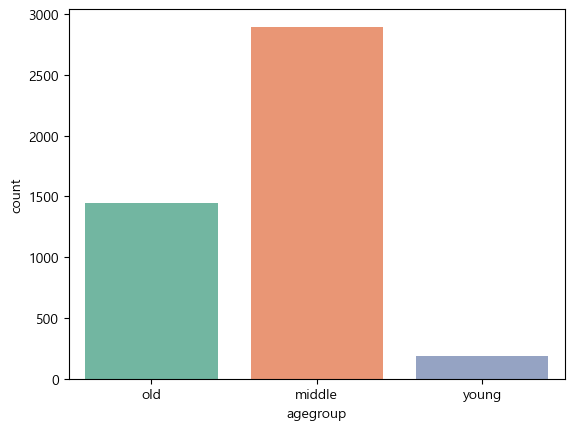

In [55]:
sns.countplot(x = 'agegroup', data = data)

In [56]:
data.groupby('agegroup', as_index = False).agg('mean')[['agegroup','income']]

,agegroup,income
0,middle,318.787366
1,old,181.846579
2,young,160.610526


<Axes: xlabel='income', ylabel='Count'>

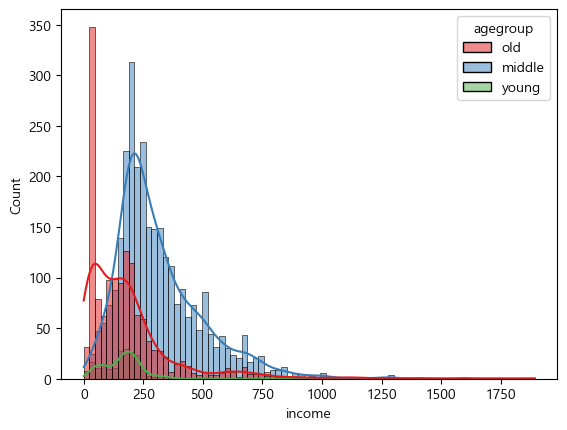

In [57]:
sns.set_palette('Set1')
sns.histplot(x = 'income', data = data, hue = 'agegroup', kde = True)

## 5). 성별, 나이대별 수입의 차이

In [58]:
data.groupby(['agegroup','sex'], as_index = False).agg('mean')[['agegroup','sex','income']].sort_values(by = 'income', ascending = False)

,agegroup,sex,income
1,middle,M,388.250158
3,old,M,268.323708
0,middle,F,235.104262
5,young,M,162.291667
4,young,F,160.042254
2,old,F,109.727503


<Axes: xlabel='agegroup', ylabel='income'>

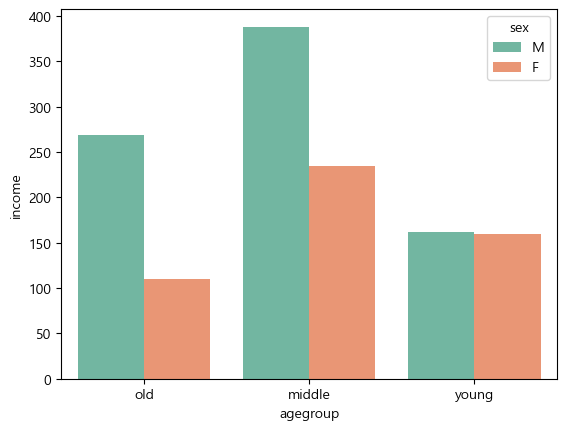

In [59]:
sns.set_palette('Set2')
sns.barplot(x = 'agegroup', y = 'income', hue = 'sex', data = data, ci = None)

## 6). 성별, 나이별 수입 차이

In [60]:
data.groupby(['age','sex'], as_index = False).agg('mean')[['age','sex','income']].head(10)

,age,sex,income
0,23.0,M,162.000000
1,24.0,F,87.666667
2,24.0,M,155.000000
3,25.0,F,124.000000
4,25.0,M,186.000000
5,26.0,F,124.388889
6,26.0,M,121.500000
7,27.0,F,178.655172
8,27.0,M,185.600000
9,28.0,F,144.370370


<Axes: xlabel='age', ylabel='income'>

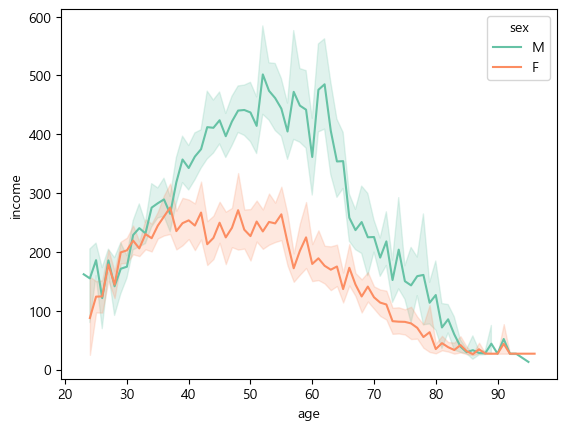

In [61]:
sns.lineplot(x = 'age', y = 'income', hue = 'sex', data = data)